In [82]:
NAME = "Anita Haque Sushma"
ID = "22301050"
SECTION = "09"

# Instructions:

This is your special assessment for CSE330 Lab. ***Please read the instructions carefully!***

1. You must rename this file as "ID_Name_Section_SA.ipynb". Example: "21212121_Niloy Farhan_01-SA.ipynb".
2. There are 4 tasks and each task have several substasks. This tasks are based on the content of lab 5 and lab 6.
3. You must use designated cells for each task. You should not use additional cells for codes of a task.
4. Some task may have no output. It will be mentioned in the designated cells.
5. Not a single line of code of this assessment should be written by AI. If you do, karma will hit you back. ;)
6. **Plagarism can lead to a zero mark in Final Assessment.**
7. If you have any queries, reach out to your lab faculties.


**Best of luck!**

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [83]:
# Import cells. This is done for you!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

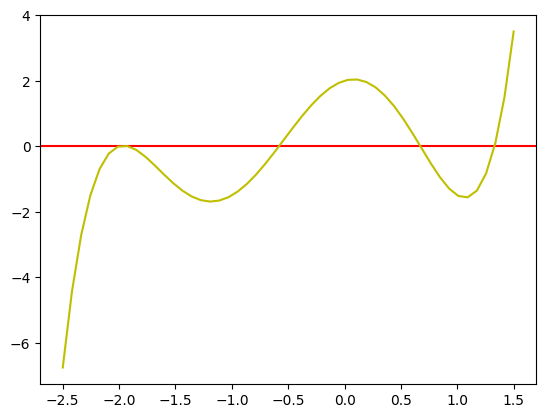

In [84]:
#1.a This cell should plot a graph. You must use polynomial class.
f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
x = np.linspace(-2.5, 1.5, 50)
y = f(x)
dictionary = {
    'x': x,
    'y': y
}
plt.axhline(y=0,color='r')
plt.plot(x,y,'y')


1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴
1.0
-9.340808105218201e-06


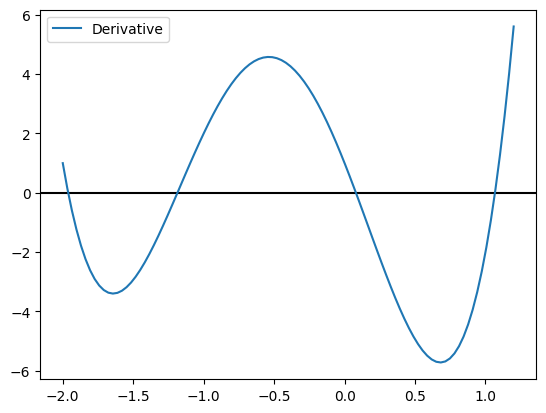

In [85]:
#1.b This cell should print and plot a graph.
f_prime = f.deriv(1)
print(f_prime)
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
data = f_prime.linspace(domain=[-2.0, 1.2])
ax.plot(data[0], data[1], label='Derivative')
ax.legend()
slope1=f_prime(0)
slope2=f_prime(-1.18625)
print(slope1)
print(slope2)

In [86]:
#1.c This cell should print
def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h
x_1 = 0.0
x_2 = -1.18625
h = 0.1
s1 = forward_diff(f, h, x_1)
s2 = forward_diff(f, h, x_2)
print(s1)
print(s2)

0.3826000000000018
0.5520088838012782


In [87]:
#1.d This cell should print
def backward_diff(f, h, x):
    return (f(x)-f(x-h)) / (h)
x_3 = 0.0
x_4 = -1.18625
h = 0.1
s3 = backward_diff(f, h, x_3)
s4 = backward_diff(f, h, x_4)
print(s3)
print(s4)

1.5776000000000012
-0.5476397529174859


In [88]:
#1.e This cell should print
def central_diff(f, h, x):
    return (f(x+h)-f(x-h)) / (2*h)
x_5 = 0.0
x_6 = -1.18625
h = 0.1
s5 = central_diff(f, h, x_5)
s6 = central_diff(f, h, x_6)
print(s5)
print(s6)

0.9801000000000015
0.002184565441896158


In [89]:
#1.f This cell should show a table
def compare(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [], "FD Error" : [], "BD Error": [], "CD Error" : []}     #
    #Write code here

    for h_i in x:
        Y_correct = f_prime(h_i)
        forward = forward_diff(f, h, h_i)
        backward = backward_diff(f, h, h_i)
        central = central_diff(f, h, h_i)

        f_error_h_i = abs(forward_diff(f, h, h_i) - Y_correct)
        b_error_h_i = abs(backward_diff(f, h, h_i) - Y_correct)
        c_error_h_i = abs(central_diff(f, h, h_i) - Y_correct)

        Result['x'].append(h_i)
        Result["Actual"].append(Y_correct)
        Result["FD"].append(forward)
        Result["BD"].append(backward)
        Result["CD"].append(central)
        Result["FD Error"].append(f_error_h_i)
        Result["BD Error"].append(b_error_h_i)
        Result["CD Error"].append(c_error_h_i)
    return Result
    # print(pd.DataFrame(Result))

h = 0.1
m = compare(f,f_prime,h,[0 ,-1.18625])
dataf = pd.DataFrame(m)
dataf.head(3)

,x,Actual,FD,BD,CD,FD Error,BD Error,CD Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,0.617400,0.57760,0.019900
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,0.552018,0.54763,0.002194


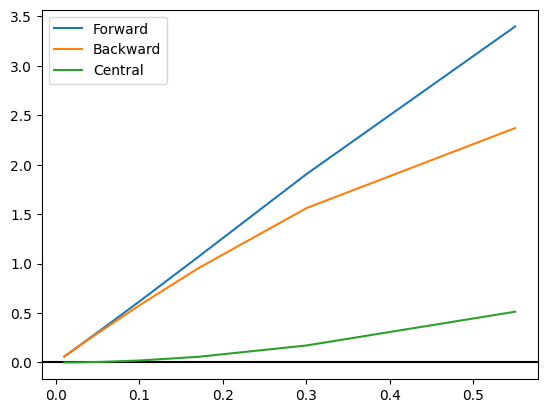

In [90]:
#1g This cell should plot a graph.
def error_1(f, f_prime, h, x):
    Y_correct = f_prime(x)
    f_error   = np.array([])
    b_error   = np.array([])
    c_error   = np.array([])

    for h_i in h:
        f_error_h_i = forward_diff(f, h_i, x) - Y_correct
        f_error = np.append(f_error, f_error_h_i)

        b_error_h_i = backward_diff(f, h_i, x) - Y_correct
        b_error = np.append(b_error, b_error_h_i)

        c_error_h_i = central_diff(f, h_i, x) - Y_correct
        c_error = np.append(c_error, c_error_h_i)

    return f_error, b_error, c_error

h1 = np.array([0.55,0.3,.17,0.1,0.055,0.03,0.017,0.01])
x_7 = 0.0
err = error_1(f, f_prime, h1, x_7)
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.plot(h1, abs(err[0]), label='Forward')
ax.plot(h1, abs(err[1]), label='Backward')
ax.plot(h1, abs(err[2]), label='Central')
ax.legend()

# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [91]:
#2a. This cell should not have any output.
Proposed_Method_Name = " Richardson Extrapolation "

#Write Code here
def central_diff(f, h, x):
    return (f(x+h) - f(x-h)) / (2*h)

def richardson_extrapolation(f, h, x):
    d_h  = central_diff(f, h, x)
    d_h2 = central_diff(f, h/2, x)
    return (4 * d_h2 - d_h) / 3

f=Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
f_prime = f.deriv(1)
# print(f)
# print(f_prime)

In [92]:
#2b. This cell should print
x_1 = 0.0
x_2 = -1.18625
h   = 0.1
slope1 = richardson_extrapolation(f, h, x_1)
slope2 = richardson_extrapolation(f, h, x_2)
print(slope1)
print(slope2)

0.9999750000000011
-3.4340808106048115e-05


In [93]:
#2c.This cell should print

def compare1(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [],"RE": [], "FD Error" : [], "BD Error": [], "CD Error" : [], "RE Error" : []}
    #Write code here
    for h_i in x:

        Y_correct = f_prime(h_i)
        forward   = forward_diff(f, h, h_i)
        backward  = backward_diff(f, h, h_i)
        central   = central_diff(f, h, h_i)
        proposed  = richardson_extrapolation(f, h, h_i)

        f_error_h_i = abs(forward_diff(f, h, h_i) - Y_correct)
        b_error_h_i = abs(backward_diff(f, h, h_i) - Y_correct)
        c_error_h_i = abs(central_diff(f, h, h_i) - Y_correct)
        p_error_h_i = abs(richardson_extrapolation(f, h, h_i) - Y_correct)

        Result['x'].append(h_i)
        Result["Actual"].append(Y_correct)
        Result["FD"].append(forward)
        Result["BD"].append(backward)
        Result["CD"].append(central)
        Result["RE"].append(proposed)

        Result["FD Error"].append(f_error_h_i)
        Result["BD Error"].append(b_error_h_i)
        Result["CD Error"].append(c_error_h_i)
        Result["RE Error"].append(p_error_h_i)

    # print(pd.DataFrame(Result))
    return Result

h = 0.1
# f_prime=f.deriv(1)
n = compare1(f,f_prime,h,[0 ,-1.18625])
dataf = pd.DataFrame(n)
dataf.head(3)

,x,Actual,FD,BD,CD,RE,FD Error,BD Error,CD Error,RE Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,0.999975,0.617400,0.57760,0.019900,0.000025
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,-0.000034,0.552018,0.54763,0.002194,0.000025


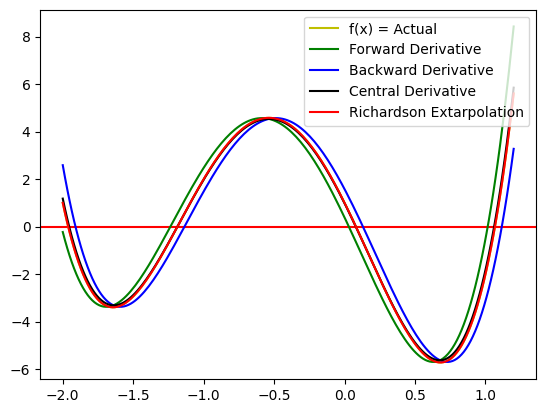

In [94]:
#2.d This cell should plot a graph.
x = np.linspace(-2, 1.2, 200)
h = 0.1
f_prime = f.deriv(1)
y = f_prime(x)
forward_d  = forward_diff(f,h,x)
backward_d = backward_diff(f,h,x)
central_d  = central_diff(f,h,x)
richardson = richardson_extrapolation(f,h,x)

plt.axhline(y = 0, color = 'r')
plt.plot(x, y, label='f(x) = Actual', color='y')
plt.plot(x, forward_d, label='Forward Derivative', color='g')
plt.plot(x, backward_d, label='Backward Derivative', color ='b')
plt.plot(x, central_d, label='Central Derivative', color = 'k' )
plt.plot(x, richardson, label='Richardson Extarpolation', color= 'r')

plt.legend()

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

In [95]:
#3a_i This cell should print
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]  #  This snippet will be given in the question
f = Polynomial([-10.0, -9.5, 2.0, (-1/13)])
root_e = {}
for i in intervals:
    x_1,x_2 = i
    f1 = f(x_1)
    f2 = f(x_2)
    if f1 * f2 < 0:
        root_e[i] = True
    else:
        root_e[i] = False
print(root_e)

{(-20, -10): False, (-10, 0): True, (0, 10): True, (10, 20): True, (20, 30): False}


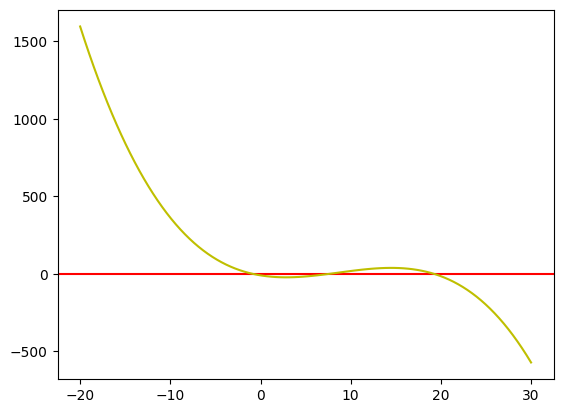

In [96]:
#3a_ii This cell should plot a graph.
x = np.linspace(-20, 30, 100)
y = f(x)

plt.axhline(y = 0, color = 'r')
plt.plot(x, y, 'y')

b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

In [97]:
#3b This cell should print
e = 1e-6
roots = []

def bisection(f, a, b, error):
    m = (a+b)/2
    root = 0.0

    list_a = []
    list_b = []
    list_m = []
    list_f = []

    root_found = False
    while not root_found:
        list_a.append(a)
        list_b.append(b)
        list_m.append(m)
        list_f.append(f(m))

        if f(m) == 0:
            root = m
            root_found = True
            break
        elif f(a)*f(m) < 0:
            b = m
        else:
            a = m
        m_old = m
        m = (a+b)/2
        if abs((m-m_old)/m) <= error:
           root = m
           root_found = True
    return root

for i in root_e.items():
    if i[1] == True:
        roots.append(bisection(f, i[0][0], i[0][1], e))
print(roots)

[-0.8829361200332642, 7.658982276916504, 19.223957061767578]


c. Plot the f(x) along with the roots to check if your method is working correctly.

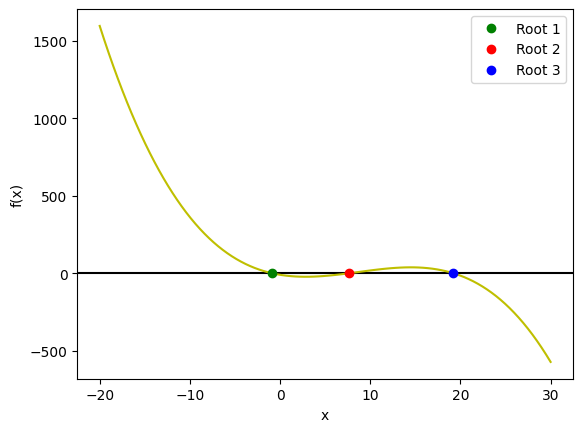

In [98]:
#3c This cell plot a graph.
x = np.linspace(-20, 30, 100 )
y = f(x)

fig, ax = plt.subplots()
ax.axhline(y = 0, color='k')

ax.set_xlabel('x')
ax.set_ylabel('f(x)')

ax.plot(x, y, 'y')
ax.plot(roots[0], f(roots[0]), 'go', label = "Root 1")
ax.plot(roots[1], f(roots[1]), 'ro', label = "Root 2")
ax.plot(roots[2], f(roots[2]), 'bo', label = "Root 3")
ax.legend()

Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [99]:
#4a This cell should print
f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0 ])
# print(f)
roots = f.roots()
print(roots)


[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


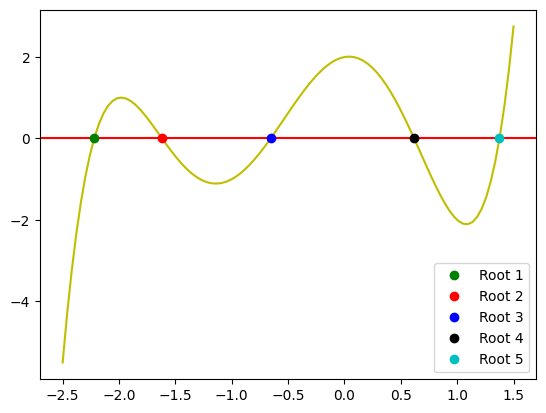

In [100]:
#4b This cell should print plot a graph
x = np.linspace(-2.5, 1.5, 100)
y = f(x)
dictionary = {
    'x': x,
    'y': y
}
plt.axhline(y=0, color='r')
plt.plot(x, y,'y')
plt.plot(roots[0], f(roots[0]), 'go', label = "Root 1")
plt.plot(roots[1], f(roots[1]), 'ro', label = "Root 2")
plt.plot(roots[2], f(roots[2]), 'bo', label = "Root 3")
plt.plot(roots[3], f(roots[2]), 'ko', label = "Root 4")
plt.plot(roots[4], f(roots[2]), 'co', label = "Root 5")
plt.legend()
# plt.plot(f.roots(), [0.0]*5, 'go')

In [101]:
#4c This cell should print
p=Polynomial([-2.0, 0.0, 6.0, 2.0, -2.5, -1.0])
g1= p * 0.5
# print(g1)
g1_prime = g1.deriv(1)
# print(g1_prime)
roots=f.roots()
lamda_v=[]
for i in roots:
    g = abs(g1_prime(i))
    lamda_v.append(g)
print(lamda_v)


[4.560147914010179, 2.190983005625052, 1.698037036564977, 3.309016994374949, 8.023065049424764]


In [102]:
#4d This cell should print
count = 0
for i in lamda_v:
    if i > 1:
        count += 1
    else:
        pass
if len(lamda_v) == count:
    print('g1(x) is divergent')
else:
    print('g1(x) is not divergent')


g1(x) is divergent


In [103]:
#4e This cell have no outputs
def g2(x):
    p = Polynomial([2.0, 0.5, 0.0, -2.0, 2.5, 1.0])
    return np.sqrt(p(x)/6)

def g3(x):
    p = Polynomial([-2.0, -0.5, 6.0, 2.0, 0.0, -1.0])
    return np.power(p(x)/2.5, 1.0/4.0)

def g4(x):
    p = Polynomial([-2.0, -0.5, 6.0, 2.0, -2.5])
    return np.power(p(x) , 1.0/5.0)

def g5(x):
    p = Polynomial([2.0, 0.5, -2.0, -2.0, 2.5, 1.0])
    return np.sqrt(p(x)/4)

In [104]:
#4f This cell should print
x_2  = 0.8
g2_x = []

x_3  = 0.8
g3_x = []

x_4  = 0.8
g4_x = []

x_5  = 0.8
g5_x = []

for i in range(20):
    g2_x.append(x_2)
    g3_x.append(x_3)
    g4_x.append(x_4)
    g5_x.append(x_5)

    x_2 = g2(x_2)
    x_3 = g3(x_3)
    x_4 = g4(x_4)
    x_5 = g5(x_5)

if len(g2_x) > 0:
    root = np.array([g2_x[len(g2_x)-1], g3_x[len(g3_x)-1], g4_x[len(g4_x)-1], g5_x[len(g5_x)-1]])

# print(pd.DataFrame({'g2(x)':g2_x, 'g3(x)':g3_x, 'g4(x))':g4_x, 'g5(x))':g5_x, }))
dt = pd.DataFrame({'g2(x)':g2_x, 'g3(x)':g3_x, 'g4(x))':g4_x, 'g5(x))':g5_x, })
dt.head(20)

,g2(x),g3(x),g4(x)),g5(x))
0,0.800000,0.800000,0.800000,0.800000
1,0.674250,0.961461,1.075654,0.601598
2,0.629830,1.126203,1.288144,0.622046
3,0.620179,1.249411,1.362956,0.617089
4,0.618412,1.320336,1.374225,0.618259
5,0.618100,1.353509,1.375189,0.617981
6,0.618046,1.367069,1.375262,0.618047
7,0.618036,1.372244,1.375267,0.618031
8,0.618034,1.374162,1.375268,0.618035
9,0.618034,1.374865,1.375268,0.618034


<ipython-input-103-c56563a276ce>:8: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5, 1.0/4.0)
<ipython-input-103-c56563a276ce>:12: RuntimeWarning: invalid value encountered in power
  return np.power(p(x) , 1.0/5.0)


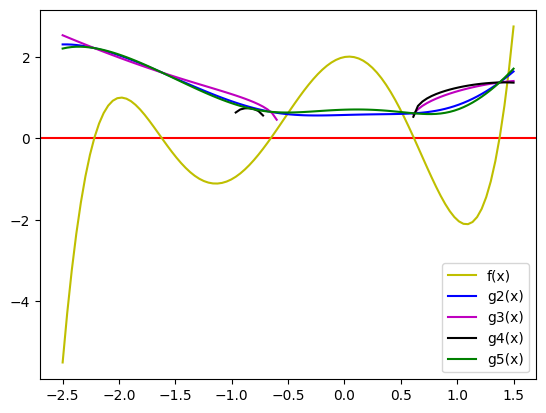

In [105]:
#4g This cell should plot a graph. Do not plot those g(x) which will not converge.
xs = np.linspace(-2.5, 1.5, 100)
ys = f(xs)
dictionary = {
    'x': xs,
    'y': ys
}

plt.axhline(y = 0, color = 'r')
plt.plot(xs, ys,     label = 'f(x)' , color = 'y')
plt.plot(xs, g2(xs), label = 'g2(x)', color = 'b')
plt.plot(xs, g3(xs), label = 'g3(x)', color = 'm' )
plt.plot(xs, g4(xs), label = 'g4(x)', color = 'k' )
plt.plot(xs, g5(xs), label = 'g5(x)', color = 'g' )

plt.legend()